# KNN Tutorial

For the tutorial we are going to us>e the car dataset (DESCRIPTION OF THE CAR DATASET AND WHERE TO FIND IT)

##list of all hte libs thare are going to be used and how to install them both using PIP.

#First we are to import all the libs that a important to us

In [5]:
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

After importing the libs, we are going to import our dataset using the pd.read_csv() function then,
inspect our data using the head() funtion to print the first 5 rows of our dataset. Both function are from pandas lib.

In [13]:
df = pd.read_csv('/home/mr-g3tl3m4n/Documents/DataSets/datasets/Car-Data-Set/car.csv')

print(df.head())

  buying  maint door persons lug_boot safety  class
0  vhigh  vhigh    2       2    small    low  unacc
1  vhigh  vhigh    2       2    small    med  unacc
2  vhigh  vhigh    2       2    small   high  unacc
3  vhigh  vhigh    2       2      med    low  unacc
4  vhigh  vhigh    2       2      med    med  unacc


Being this a KNN problem, we have to identify and define our our features and label.
The Features are our input data and labels are the outputs, what we want to predict, in other words the thing, using the inputs or, the features. to know more about features and labels you can THIS ARTICLE, follow THIS link
to know more about KNN in a theorical perspective and follow some of the links ate the and of the current blog.

For this particular problem, we are going to use 3 features from our dataset wich are: 'buying', 'maint', 'safety'. We are going to create a python list using thoses elements from the dataset.
The label is going to be the 'class' column from our dataset.


In [21]:
X = df[['buying', 'maint', 'safety']].values
print('FEATURES:\n', X)

y = df['class']
print('LABELS:\n', y)

FEATURES:
 [['vhigh' 'vhigh' 'low']
 ['vhigh' 'vhigh' 'med']
 ['vhigh' 'vhigh' 'high']
 ...
 ['low' 'low' 'low']
 ['low' 'low' 'med']
 ['low' 'low' 'high']]
LABELS:
 0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object


After creating the features and the labels, considering tha an computer does't understand any human language, we have to make a small convertion of the features and the labels to a numerical notation so the computer can understand them, using the following code

In [26]:
#features
X = df[['buying', 'maint', 'safety']].values
#print('FEATURES', X)

y = df['class']
#print("LABELS:\n", y)

#Converting X to a numerical notation
Le = LabelEncoder()
for i in range(len(X[0])):
    X[:, i] = Le.fit_transform(X[:, i])

#print('Converted X\n:', X)


#converting y to a numerical notation
label_mapping = {'unacc':0, 'acc':1, 'good':2, 'vgood':3}

y = y.map(label_mapping)
y = np.array(y)

#print('Converted y:\n',y)

And finally, after preparing all the data, we are going to make the prediction model and test its accuracy.
We will use the neighbors.KNeighborsClassifier() function from th Sk-Learn lib and give 2 two argumewnts to it.
The first one will be the K values wich is the distance between the Neighbors and the weights, wich is the way our predictive model  with handle all the datapoints.

After that, we are going to split the data into traing and testing data, both for the features and the labels. The training data is used to make the model learn from  features of the dataset and know to wich class the combination of thoses features belong to and, the testing data is used to find out to wich point the model learned and what is the level of accuracy of the preditions the model is going to make.

This process is done by comparing the actual data with the results of the preditions made by the model.

The taining data is generated by selecting ramdomly a small porcentage of the data, for this example, we are going to uso 20% of the data for the test process and, 80% for the traing.


In [27]:
#KNN model
knn = neighbors.KNeighborsClassifier(n_neighbors= 25, weights = 'uniform') 

# Spliting the data into traing and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Fitting the data
knn.fit(X_train, y_train)

#Making the prediction
prediction  = knn.predict(X_test)

#Testing the accuracy
acc = metrics.accuracy_score(y_test, prediction)

print(prediction)
print(acc)


[0 2 1 1 0 1 0 1 0 0 0 0 1 0 0 3 2 0 1 3 2 0 1 0 1 3 3 0 0 2 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 3 0 0 2 0 1 1 3 2 3 0 3 0 0 0 0 2 0 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 2 1 3 0 1 0 0 2 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 2 0 0 1
 0 0 0 0 0 2 0 1 0 0 0 1 3 1 0 3 0 2 2 2 0 0 0 0 2 0 2 1 0 0 1 0 0 0 0 1 1
 1 0 0 1 0 1 0 3 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 3 0 0 0
 2 0 0 1 2 0 0 0 0 0 1 3 0 0 0 0 0 0 0 2 0 1 1 0 3 2 0 0 0 1 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 1 0 1 0 3 1 3 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 3 0 0 0 3 2
 1 0 1 0 0 0 0 3 0 0 0 0 1 0 2 1 3 0 1 0 1 0 2 0 0 0 0 1 3 0 3 0 0 0 0 0 0
 0 0 0 0 0 1 2 0 0 0 1 0 0 1 0 0 0 3 0 2 0 2 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 2 2 0 0 0 0 3 1 1 0 1]
0.7456647398843931


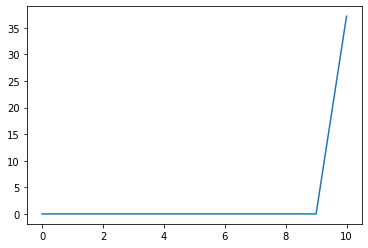

In [29]:
import numpy as np
import matplotlib . pyplot as plt
def generate_data (beta , sig , n):
    u = np. random .rand(n, 1)
    y = u ** np. arange (0, 4) @ beta. reshape (4 ,1) + (
    sig * np. random . randn (n, 1))
    return u, y
np. random .seed (12)
beta = np.array ([[10.0 , -140, 400, -250]]).T;
sig =5; n = 10**2;
u,y = generate_data (beta ,sig ,n)
X = np.ones ((n, 1))
K = 12 # maximum number of parameters
press = np.zeros(K+1)
for k in range (1,K):
    if k > 1:
        X = np. hstack ((X, u**(k -1))) # add column to matrix
    P = X @ np. linalg .pinv(X) # projection matrix
    e = y - P @ y
press[k] = np.sum ((e/(1 - np.diag(P). reshape (n ,1)))**2)
plt.plot(press [1:K]/n)